In [9]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from modules.get_df_for_preprocessing import GetDfForPreprocessing, create_agg
from modules.proccess_data import remove_outliers, create_pca
from modules.get_df_info import describe
from modules.create_viz import compare_date_app_usage, create_boxplot, create_pair_plot

## Read data

In [10]:
dfs = pd.read_csv('./data/Week1_challenge_data_source.csv', parse_dates=['Start','End'])

In [11]:
prep = GetDfForPreprocessing(dfs)
telco_raw = prep.drop_cols_abv_na_trshld(0.3)


Comparing threshold with fraction of missing values ...

Retrieving columns to be dropped ...

Columns to be dropped : ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B']

Dropping columns with missing values above the threshold ...

Dropping columns completed


## slice dataframe for aggreagation

In [12]:
slice_cols = ['MSISDN/Number',
    'Dur. (ms)',
    'num_xDR_sess',
    'Social Media DL (Bytes)',
    'Social Media UL (Bytes)',
    'Youtube DL (Bytes)',
    'Youtube UL (Bytes)',
    'Netflix DL (Bytes)',
    'Netflix UL (Bytes)',
    'Google DL (Bytes)',
    'Google UL (Bytes)',
    'Email DL (Bytes)',
    'Email UL (Bytes)',
    'Gaming DL (Bytes)',
    'Gaming UL (Bytes)',
    'Other DL (Bytes)',
    'Other UL (Bytes)',
    'Total DL (Bytes)',
    'Total UL (Bytes)']

In [13]:
telco_agg = create_agg(df=telco_raw, slice_cols=slice_cols, agg_col='MSISDN/Number')

## Save aggregated data for fututre use

In [14]:
telco_agg.reset_index().to_csv('./data/telco_agg.csv')

## Removing outliers

In [15]:
telco_df_processed = remove_outliers(telco_agg)

Iterating through columns of dataframe...
Computing z-score for values...
Replacing outliers in num_xDR_sess
Replacing outliers in num_xDR_sess
Computing z-score for values...
Replacing outliers in Tot_DL_UL (Bytes)
Replacing outliers in Tot_DL_UL (Bytes)
Replacing outliers in Tot_DL_UL (Bytes)
Replacing outliers in Tot_DL_UL (Bytes)
Replacing outliers in Tot_DL_UL (Bytes)
Replacing outliers in Tot_DL_UL (Bytes)
Replacing outliers in Tot_DL_UL (Bytes)
Replacing outliers in Tot_DL_UL (Bytes)
Replacing outliers in Tot_DL_UL (Bytes)
Replacing outliers in Tot_DL_UL (Bytes)
Replacing outliers in Tot_DL_UL (Bytes)
Replacing outliers in Tot_DL_UL (Bytes)
Replacing outliers in Tot_DL_UL (Bytes)
Replacing outliers in Tot_DL_UL (Bytes)
Computing z-score for values...
Replacing outliers in Social Media total data (Bytes)
Replacing outliers in Social Media total data (Bytes)
Replacing outliers in Social Media total data (Bytes)
Replacing outliers in Social Media total data (Bytes)
Replacing outlie

In [16]:
telco_df_processed.reset_index().to_csv('./data/telco_df_processed.csv')

## Get the statistical description of processed and raw data

In [17]:
task1_raw_data_desc = describe(df=telco_agg)
task1_proces_data_desc = describe(df=telco_df_processed)

In [18]:
task1_raw_data_desc

,num_xDR_sess,Tot_DL_UL (Bytes),Social Media total data (Bytes),Youtube total data (Bytes),Netflix total data (Bytes),Google total data (Bytes),Email total data (Bytes),Gaming total data (Bytes),Other total data (Bytes),Dur. (ms)
count,106856.000000,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05
mean,9.756542,6.909621e+08,2.547967e+06,3.155840e+07,3.153833e+07,1.088243e+07,3.148796e+06,5.997690e+08,5.985088e+08,1.461672e+05
std,5.642154,4.910559e+08,1.908038e+06,2.129492e+07,2.128956e+07,7.544861e+06,2.222400e+06,4.491505e+08,4.489221e+08,1.863587e+05
min,7.000000,3.324901e+07,1.563000e+03,7.890300e+04,1.845690e+05,4.033000e+04,1.817600e+04,3.063580e+05,1.490450e+05,7.142000e+03
25%,7.000000,3.585499e+08,1.211282e+06,1.863109e+07,1.855597e+07,5.942636e+06,1.674481e+06,2.880631e+08,2.855599e+08,7.130800e+04
50%,7.000000,6.179231e+08,2.303756e+06,2.680038e+07,2.671889e+07,9.586153e+06,2.799824e+06,5.423492e+08,5.398323e+08,1.027400e+05
75%,14.000000,8.574351e+08,3.307509e+06,3.792798e+07,3.797696e+07,1.321474e+07,3.847198e+06,7.773041e+08,7.753975e+08,1.727990e+05
max,126.000000,8.846226e+09,4.337478e+07,4.529588e+08,3.995191e+08,1.521919e+08,4.241878e+07,7.749432e+09,8.167878e+09,1.855375e+07
skew,3.353461,2.269575e+00,2.090459e+00,2.539667e+00,2.478571e+00,2.401221e+00,2.374521e+00,2.068188e+00,2.007267e+00,2.053955e+01
mad,4.010420,3.427336e+08,1.362683e+06,1.457490e+07,1.463285e+07,5.193563e+06,1.534227e+06,3.196993e+08,3.203485e+08,9.037148e+04


In [11]:
task1_proces_data_desc

,num_xDR_sess,Tot_DL_UL (Bytes),Social Media total data (Bytes),Youtube total data (Bytes),Netflix total data (Bytes),Google total data (Bytes),Email total data (Bytes),Gaming total data (Bytes),Other total data (Bytes),Dur. (ms)
count,106856.0,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,1.068560e+05,106856.000000
mean,7.0,6.211891e+08,2.308541e+06,2.812292e+07,2.812396e+07,9.748681e+06,2.823731e+06,5.420933e+08,5.407515e+08,116143.267435
std,0.0,3.374247e+08,1.387021e+06,1.358318e+07,1.366656e+07,5.016780e+06,1.495755e+06,3.237575e+08,3.243180e+08,67127.210811
min,7.0,3.324901e+07,1.563000e+03,7.890300e+04,1.845690e+05,4.033000e+04,1.817600e+04,3.063580e+05,1.490450e+05,7142.000000
25%,7.0,3.585499e+08,1.211282e+06,1.863109e+07,1.855597e+07,5.942636e+06,1.674481e+06,2.880631e+08,2.855599e+08,71308.000000
50%,7.0,6.179231e+08,2.303756e+06,2.680038e+07,2.671889e+07,9.586153e+06,2.799824e+06,5.423492e+08,5.398323e+08,102740.000000
75%,7.0,8.136075e+08,3.154820e+06,3.483392e+07,3.486503e+07,1.232394e+07,3.632052e+06,7.396146e+08,7.375140e+08,154388.750000
max,7.0,1.633406e+09,6.469021e+06,6.887004e+07,6.911905e+07,2.479729e+07,7.310768e+06,1.513288e+09,1.513603e+09,317501.000000
skew,0.0,6.048119e-01,5.561144e-01,6.661398e-01,6.774714e-01,6.386667e-01,6.069575e-01,5.450004e-01,5.590742e-01,0.599890
mad,0.0,2.674358e+08,1.109011e+06,1.057500e+07,1.064172e+07,3.938744e+06,1.180256e+06,2.585554e+08,2.590309e+08,54618.290355


## Save the descriptions for presentation

In [21]:
task1_raw_data_desc.to_csv('./data/task1_raw_data_desc_raw.csv')
#task1_proces_data_desc.to_csv('./data/task1_proces_data_desc.csv')

## Compare date and data usuage

In [13]:
usage_lst = ['Social Media DL (Bytes)',
        'Social Media UL (Bytes)',
        'Youtube DL (Bytes)',
        'Youtube UL (Bytes)',
        'Netflix DL (Bytes)',
        'Netflix UL (Bytes)',
        'Google DL (Bytes)',
        'Google UL (Bytes)',
        'Email DL (Bytes)',
        'Email UL (Bytes)',
        'Gaming DL (Bytes)',
        'Gaming UL (Bytes)',
        'Other DL (Bytes)',
        'Other UL (Bytes)']

Creating plots....
Chart saved as 'date_app_usage.png' in img directory


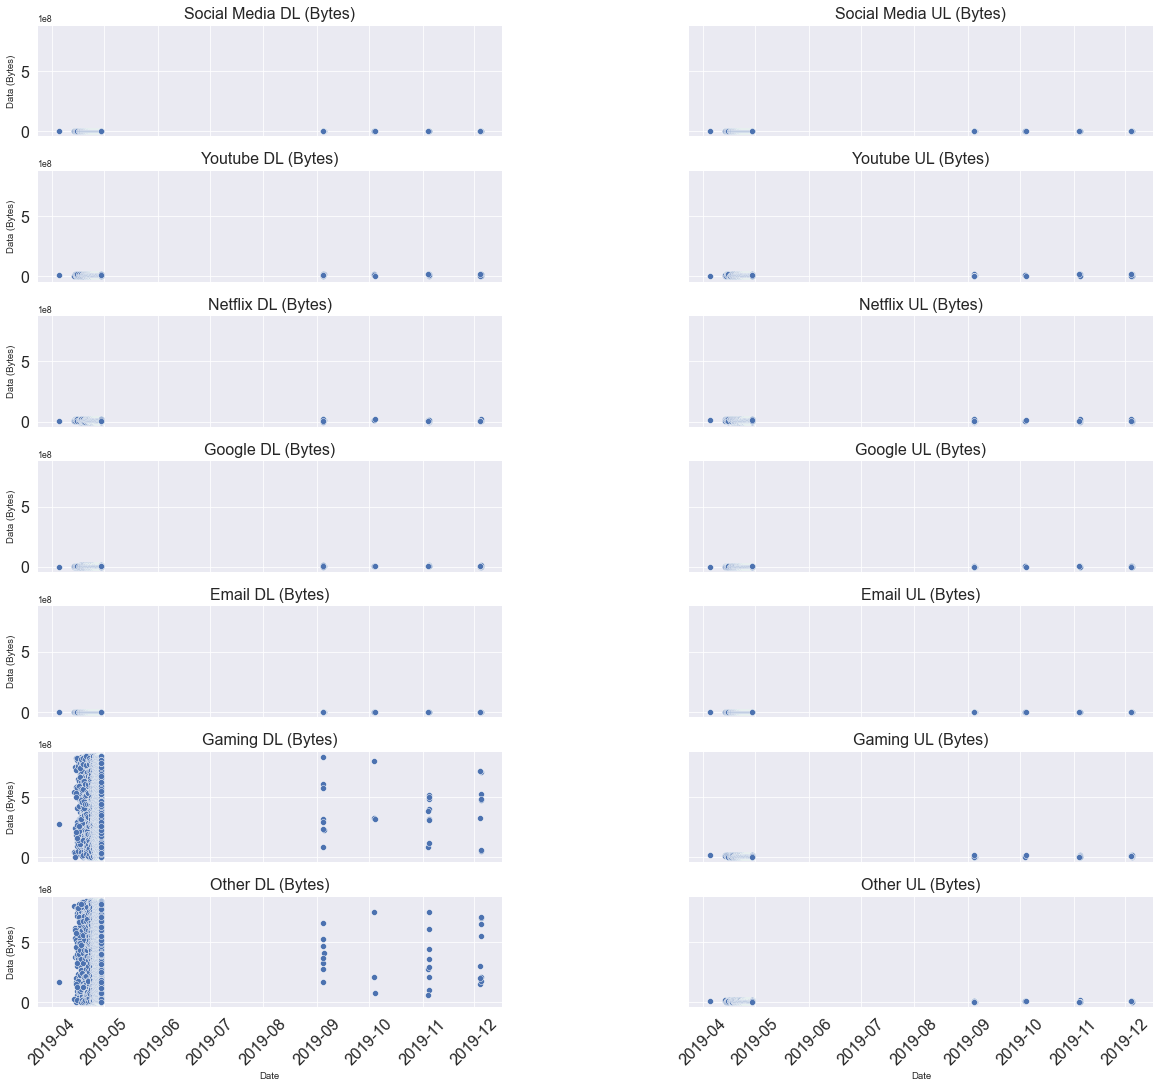

In [22]:
compare_date_app_usage(df=telco_raw,  usage_lst=usage_lst, nrows=7, ncols=2, const_col='Start', 
                       figsize=(20,15), xlabel='Date', ylabel='Data (Bytes)')

## Create Plots to visualize outliers in raw and processed data

Chart saved as processed_data.png in img directory
Chart saved as Unprocessed Data in img directory


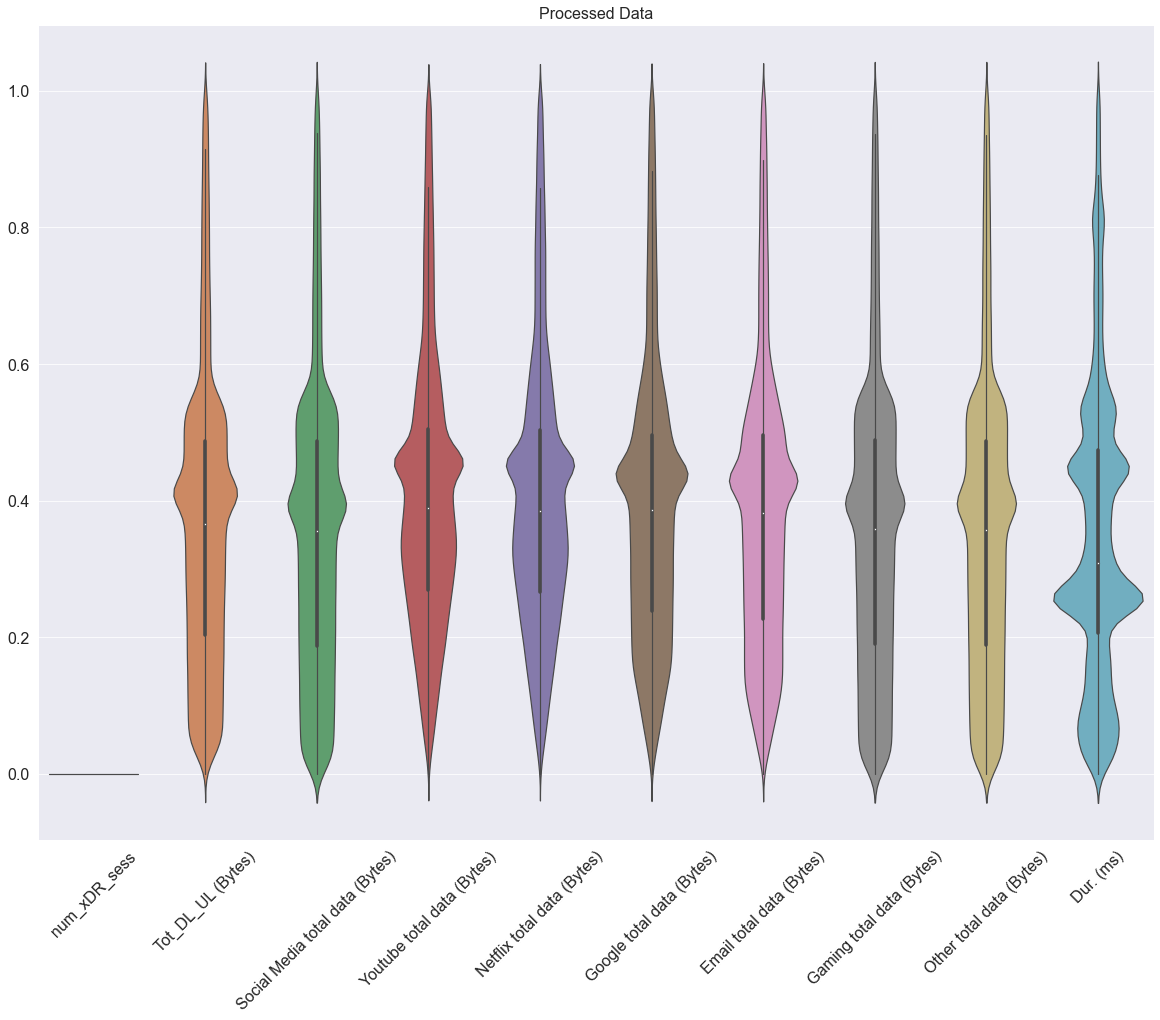

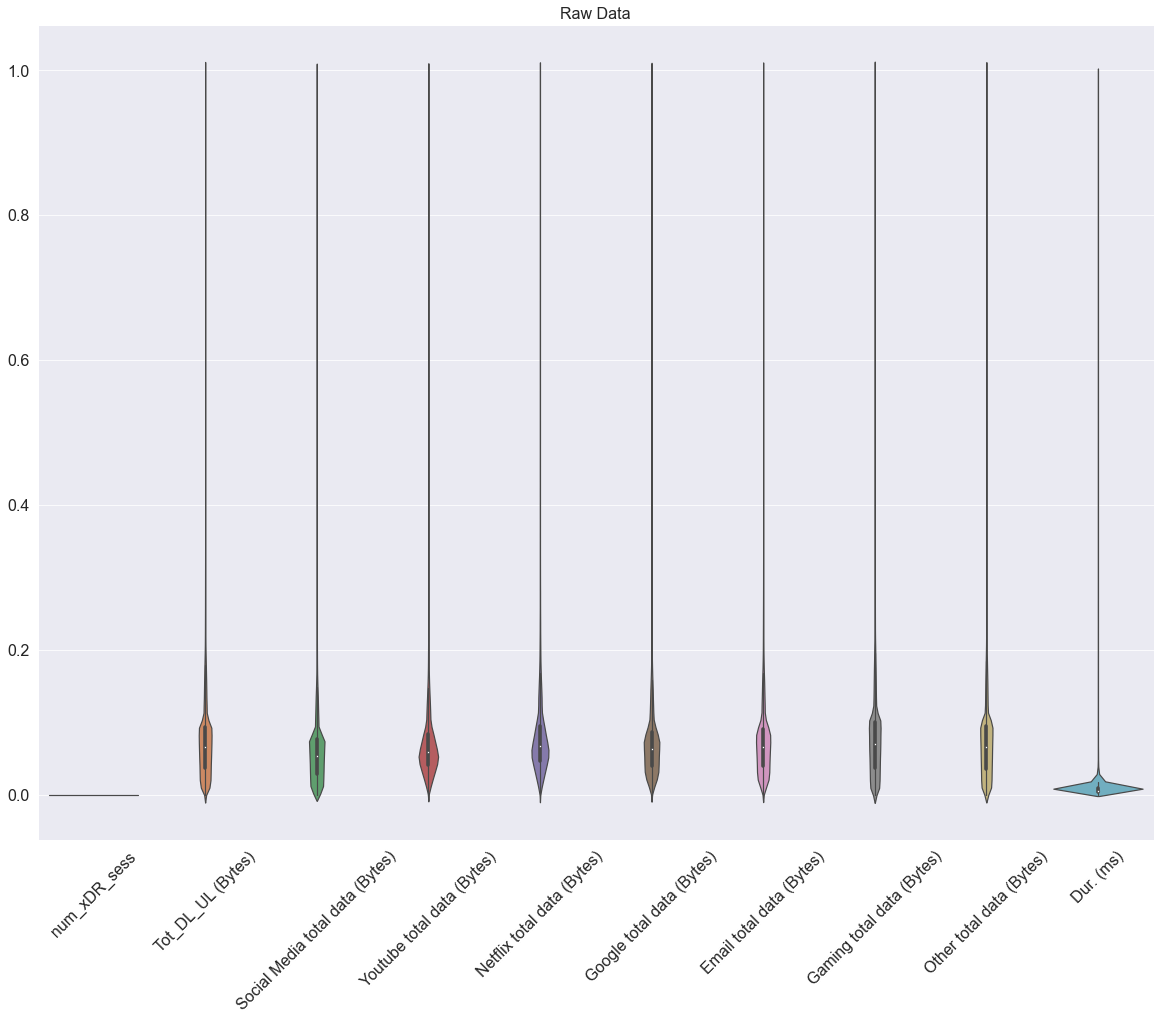

In [15]:
create_boxplot(df=telco_df_processed, filename='processed_data.png', chart_title='Processed Data')
create_boxplot(df=telco_agg, filename='Unprocessed Data', chart_title='Raw Data')

## Creating Principal Components

In [16]:
pca_df = create_pca(df=telco_df_processed, num_components=2)

Scaling inputs...
Initializing PCA...
Creating Principal Components for scaled and raw inputs...
Scoring Principal Components of scaled and raw inputs...
Selecting the Principal Components with the best score...

The selected Principal components retains 99% of the data with a lesser number of features on raw_input
Creating dataframe for selected Principal Components

Processes completed and dataframe for selected Principal Components returned


In [17]:
pca_df

,principal component 1,principal component 2
0,2.918778e+08,-2.789248e+08
1,-6.790247e+08,-1.528519e+07
2,-3.345631e+07,-2.944663e+07
3,-4.144946e+08,-3.824589e+08
4,1.157226e+09,-1.645682e+08
...,...,...
106851,5.027801e+07,-2.833031e+08
106852,-2.821131e+08,-2.448846e+08
106853,-5.223244e+08,1.268237e+08
106854,-1.786389e+08,-3.502999e+08


In [18]:
pca_df.to_csv('./data/pca_df.csv')

## Creating Pairplots for features

In [19]:
vars = ['Tot_DL_UL (Bytes)','Social Media total data (Bytes)','Youtube total data (Bytes)',
        'Netflix total data (Bytes)','Google total data (Bytes)','Email total data (Bytes)','Gaming total data (Bytes)','Other total data (Bytes)']

Chart saved as 'pair_plot.png' in img directory


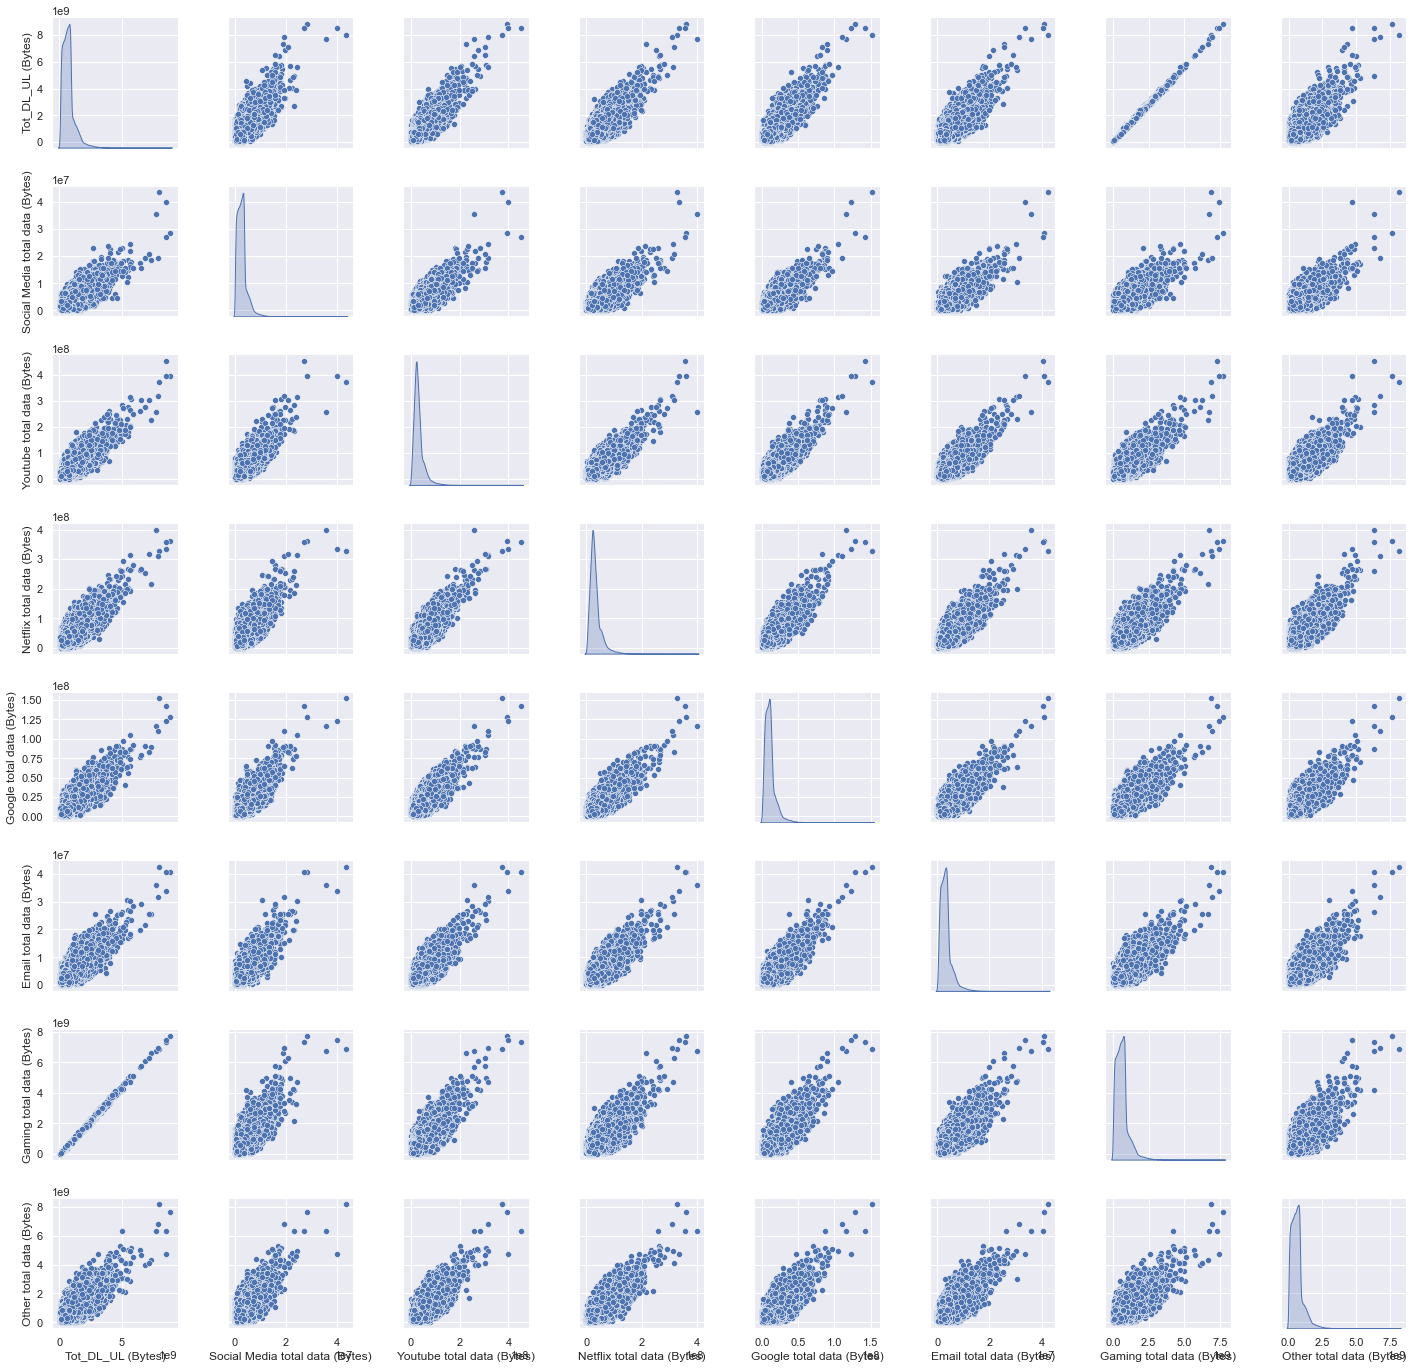

In [21]:
create_pair_plot(df=telco_agg , vars=vars)